# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['khatanga',
 'albany',
 'rawson',
 'sobolevo',
 'nikolskoye',
 'metro',
 'arraial do cabo',
 'rikitea',
 'bredasdorp',
 'gzhatsk',
 'ponta do sol',
 'santiago del estero',
 'lahaina',
 'fortuna',
 'chokurdakh',
 'punta arenas',
 'tasiilaq',
 'illoqqortoormiut',
 'hilo',
 'saskylakh',
 'sitka',
 'torbay',
 'yellowknife',
 'ushuaia',
 'nanortalik',
 'mahebourg',
 'bonavista',
 'saleaula',
 'marsa matruh',
 'wabag',
 'litoral del san juan',
 'ancud',
 'hobart',
 'dryden',
 'port hardy',
 'saint george',
 'tiksi',
 'micheweni',
 'yeppoon',
 'mataura',
 'qaanaaq',
 'taolanaro',
 'jamestown',
 'tazovskiy',
 'kegayli',
 'lubango',
 'barreirinha',
 'bubaque',
 'codrington',
 'samana',
 'dikson',
 'karauzyak',
 'alofi',
 'hithadhoo',
 'charters towers',
 'upernavik',
 'geraldton',
 'dinguiraye',
 'les cayes',
 'busselton',
 'hermanus',
 'cape town',
 'dunedin',
 'okato',
 'vaini',
 'saint-philippe',
 'east london',
 'laguna',
 'muros',
 'husavik',
 'san patricio',
 'nchelenge',
 'turukhansk',


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config info
base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
print(query_url)

https://api.openweathermap.org/data/2.5/weather?appid=8f369d5e4c49c31467462d2c8bcf84d0&units=imperial&q=


In [11]:
# Lists for results
lat = []
lng = []
city_call = []
temp = []
humidity = []
cloudiness = []
windSpeed = []
date = []
country = []

for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
         
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windSpeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        city_call.append(city)
        
        print(f"{city} is logged")      
    except: 
        print("City not found.")
    

khatanga is logged
albany is logged
rawson is logged
sobolevo is logged
nikolskoye is logged
metro is logged
arraial do cabo is logged
rikitea is logged
bredasdorp is logged
City not found.
ponta do sol is logged
santiago del estero is logged
lahaina is logged
fortuna is logged
chokurdakh is logged
punta arenas is logged
tasiilaq is logged
City not found.
hilo is logged
saskylakh is logged
sitka is logged
torbay is logged
yellowknife is logged
ushuaia is logged
nanortalik is logged
mahebourg is logged
bonavista is logged
City not found.
marsa matruh is logged
wabag is logged
City not found.
ancud is logged
hobart is logged
dryden is logged
port hardy is logged
saint george is logged
tiksi is logged
micheweni is logged
yeppoon is logged
mataura is logged
qaanaaq is logged
City not found.
jamestown is logged
tazovskiy is logged
City not found.
lubango is logged
barreirinha is logged
bubaque is logged
codrington is logged
samana is logged
dikson is logged
City not found.
alofi is logged
h

san pedro is logged
dauphin is logged
rabo de peixe is logged
bellary is logged
pangnirtung is logged
bethanien is logged
saquarema is logged
nusaybin is logged
moussoro is logged
san felipe is logged
nakama is logged
vysokogornyy is logged
aguas formosas is logged
karpogory is logged
caluquembe is logged
minab is logged
City not found.
pompeu is logged
shirokiy is logged
bereda is logged
vaitape is logged
kalemie is logged
boffa is logged
flinders is logged
abu kamal is logged
hobyo is logged
City not found.
akdepe is logged
huarmey is logged
naze is logged
coihaique is logged
santa isabel do rio negro is logged
City not found.
puerto palomas is logged
santa rosa is logged
thinadhoo is logged
asyut is logged
djibo is logged
madang is logged
City not found.
copiapo is logged
hongjiang is logged
northam is logged
ust-kuyga is logged
zhigansk is logged
veraval is logged
City not found.
sancti spiritus is logged
nosy varika is logged
santo tomas is logged
katherine is logged
kirchzarten i

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
weather_df = pd.DataFrame({"City": city_call,
                           "Country": country,
                           "Temperature": temp,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Windspeed":windSpeed,
                           "Latitude": lat,
                           "Longitude": lng,
                           "Date": date
                          })
weather_df.head()



,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
0,khatanga,RU,-7.44,99,100,6.62,71.9667,102.5000,1677963827
1,albany,US,37.38,89,100,4.09,42.6001,-73.9662,1677963574
2,rawson,AR,80.65,18,56,5.66,-43.3002,-65.1023,1677963828
3,sobolevo,RU,21.07,88,32,13.33,54.4299,31.8996,1677963828
4,nikolskoye,RU,31.89,98,98,4.88,59.7035,30.7861,1677963829


In [13]:
weather_df.to_csv("weather_df.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
#  Get the indices of cities that have humidity over 100%.
humid_100 = weather_df[(weather_df['Humidity'] > 100)]
humid_100

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

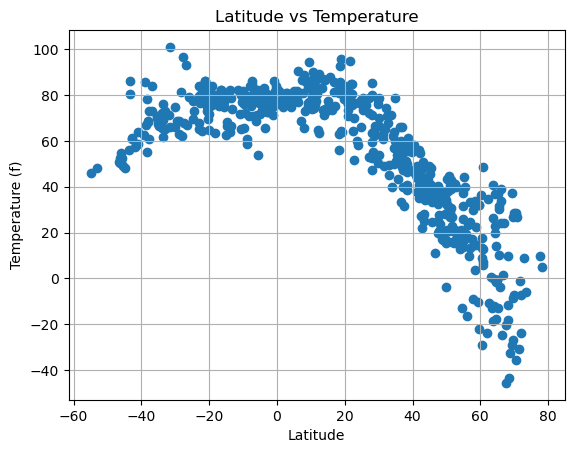

In [16]:
#set data to plot
x = weather_df["Latitude"]
y = weather_df["Temperature"]
plt.scatter(x,y)

#add gridlines
plt.grid()

#add titles and axis labels
plt.title(f"Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (f)")

#export as png
plt.savefig('../output_data/Latitude_vs_Temperature Plot.png')

#display plot
plt.show()

## Latitude vs. Humidity Plot

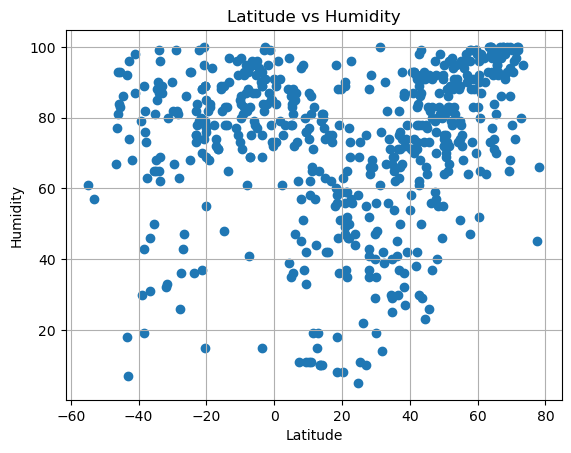

In [17]:
#set data to plot
x = weather_df["Latitude"]
y = weather_df["Humidity"]
plt.scatter(x,y)

#add gridlines
plt.grid()

#add titles and axis labels
plt.title(f"Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#export as png
plt.savefig('../output_data/Latitude_vs_Humidity Plot.png')

#display plot
plt.show()

## Latitude vs. Cloudiness Plot

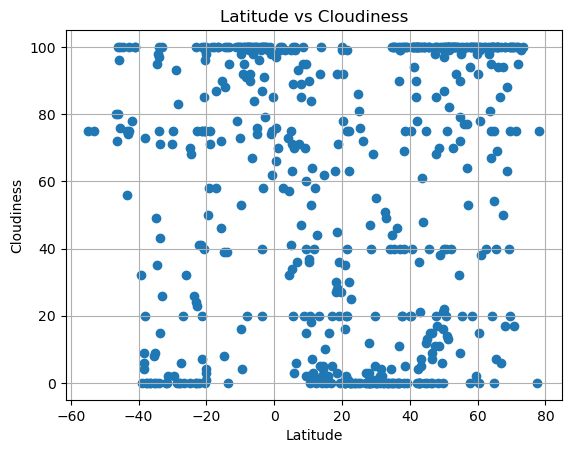

In [18]:
#set data to plot
x = weather_df["Latitude"]
y = weather_df["Cloudiness"]
plt.scatter(x,y)

#add gridlines
plt.grid()

#add titles and axis labels
plt.title(f"Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#export as png
plt.savefig('../output_data/Latitude_vs_Cloudiness Plot.png')

#display plot
plt.show()

## Latitude vs. Wind Speed Plot

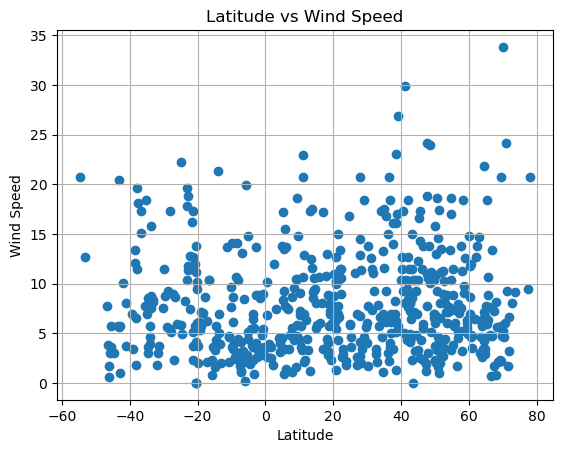

In [21]:
#set data to plot
x = weather_df["Latitude"]
y = weather_df["Windspeed"]
plt.scatter(x,y)

#add gridlines
plt.grid()

#add titles and axis labels
plt.title(f"Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#export as png
plt.savefig('../output_data/Latitude_vs_Wind Speed Plot.png')

#display plot
plt.show()

## Linear Regression

In [22]:
north_hem_df = weather_df.loc[weather_df["Latitude"] > 0]
south_hem_df = weather_df.loc[weather_df["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

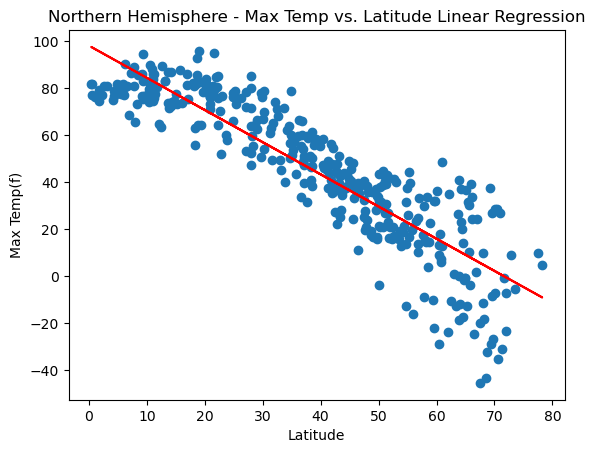

In [24]:
x_values = (north_hem_df['Latitude']).astype(float)
y_values = (north_hem_df['Temperature']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp(f)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

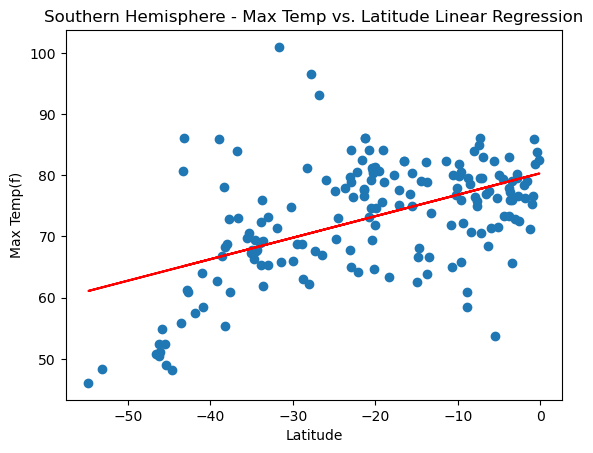

In [25]:
x_values = (south_hem_df['Latitude']).astype(float)
y_values = (south_hem_df['Temperature']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp(f)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig("Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

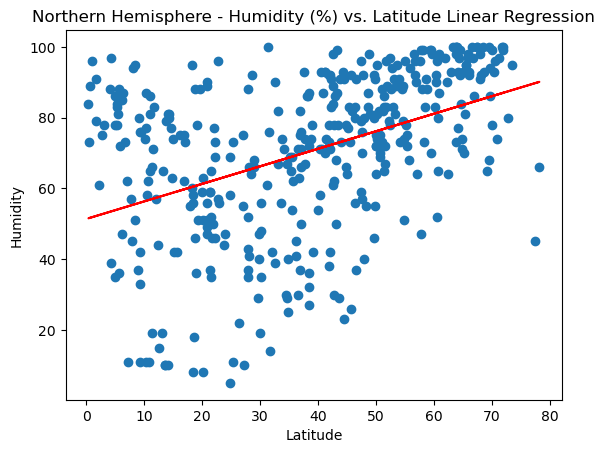

In [26]:
x_values = (north_hem_df['Latitude']).astype(float)
y_values = (north_hem_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.savefig("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

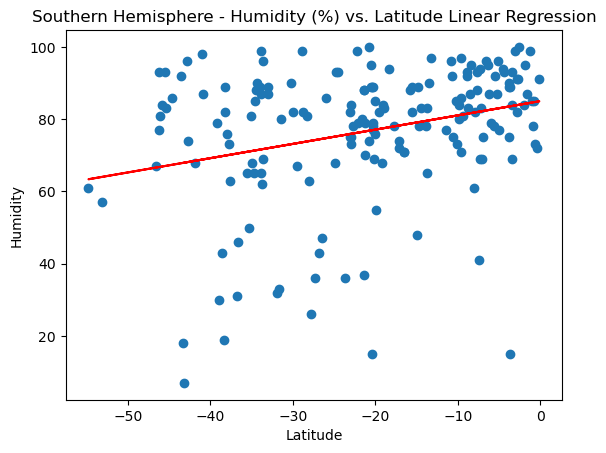

In [27]:
x_values = (south_hem_df['Latitude']).astype(float)
y_values = (south_hem_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.savefig("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

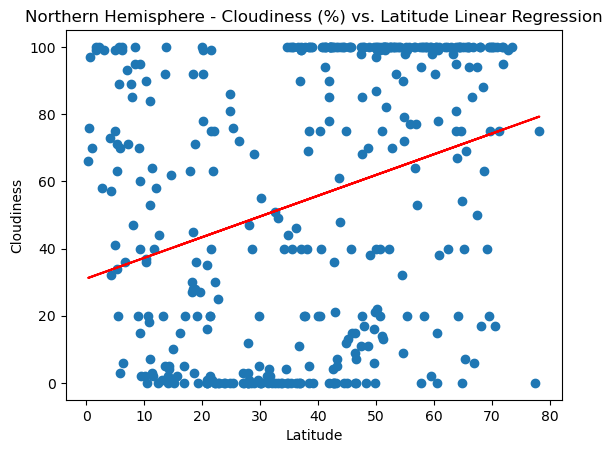

In [28]:
x_values = (north_hem_df['Latitude']).astype(float)
y_values = (north_hem_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.savefig("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

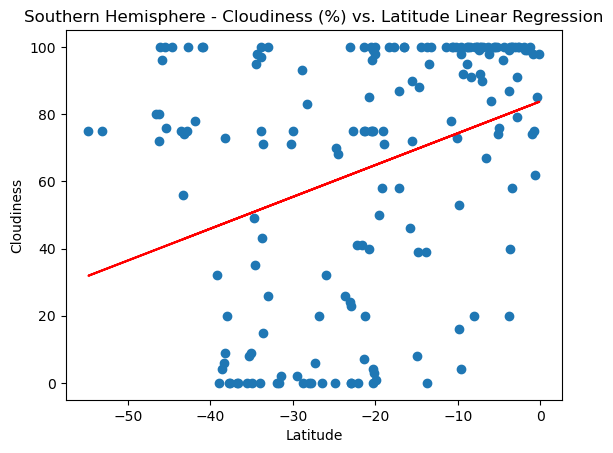

In [29]:
x_values = (south_hem_df['Latitude']).astype(float)
y_values = (south_hem_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.savefig("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

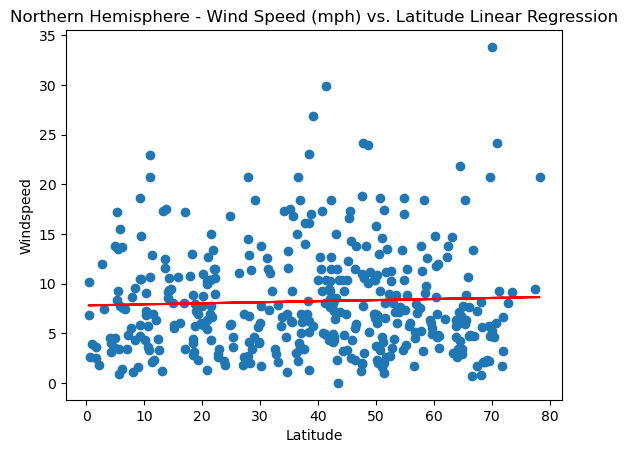

In [30]:
x_values = (north_hem_df['Latitude']).astype(float)
y_values = (north_hem_df['Windspeed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.savefig("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

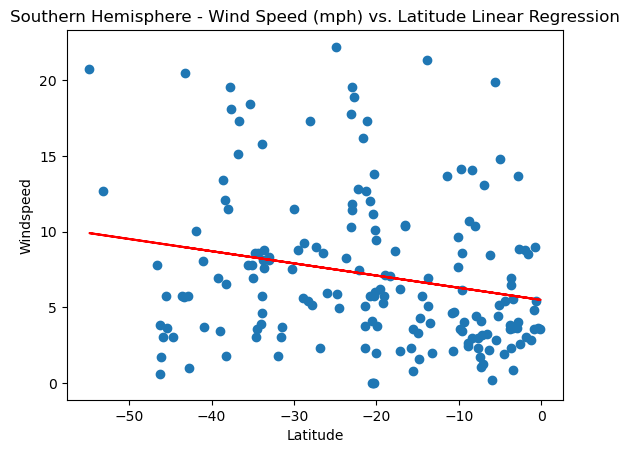

In [31]:
x_values = (south_hem_df['Latitude']).astype(float)
y_values = (south_hem_df['Windspeed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.savefig("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()